- IF Pendapatan Rendah AND Utang Tinggi AND Riwayat Buruk THEN Tidak Layak

- IF Pendapatan Sedang AND Utang Sedang AND Riwayat Rata-rata THEN Layak

- IF Pendapatan Tinggi AND Utang Rendah AND Riwayat Baik THEN Sangat Layak

- Tambahkan beberapa aturan tambahan untuk skenario lain.

Install Scikit Fuzzy terlebih dahulu

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [4]:
# 1. Definisi variabel input: Pendapatan, Utang, Riwayat Kredit
x_pendapatan = np.arange(0, 21, 1)  # Pendapatan (dalam juta)
x_utang = np.arange(0, 21, 1)       # Utang (dalam juta)
x_riwayat = np.arange(0, 11, 1)     # Riwayat Kredit (0-10 skala)

# 2. Definisi variabel output: Kelayakan Kredit
x_kelayakan = np.arange(0, 11, 1)  # Kelayakan Kredit (0-10 skala)

# Fuzzy Membership Functions for Pendapatan
pendapatan_rendah = fuzz.trapmf(x_pendapatan, [0, 0, 5, 10])
pendapatan_sedang = fuzz.trimf(x_pendapatan, [5, 10, 15])
pendapatan_tinggi = fuzz.trapmf(x_pendapatan, [10, 15, 20, 20])

# Fuzzy Membership Functions for Utang
utang_rendah = fuzz.trapmf(x_utang, [0, 0, 5, 10])
utang_sedang = fuzz.trimf(x_utang, [5, 10, 15])
utang_tinggi = fuzz.trapmf(x_utang, [10, 15, 20, 20])

# Fuzzy Membership Functions for Riwayat Kredit
riwayat_buruk = fuzz.trapmf(x_riwayat, [0, 0, 2, 4])
riwayat_rata = fuzz.trimf(x_riwayat, [2, 5, 8])
riwayat_baik = fuzz.trapmf(x_riwayat, [6, 8, 10, 10])

# Fuzzy Membership Functions for Kelayakan Kredit
kelayakan_tidak = fuzz.trapmf(x_kelayakan, [0, 0, 2, 4])
kelayakan_layak = fuzz.trimf(x_kelayakan, [3, 5, 7])
kelayakan_sangat = fuzz.trapmf(x_kelayakan, [6, 8, 10, 10])

Visualisasi Keanggotaan

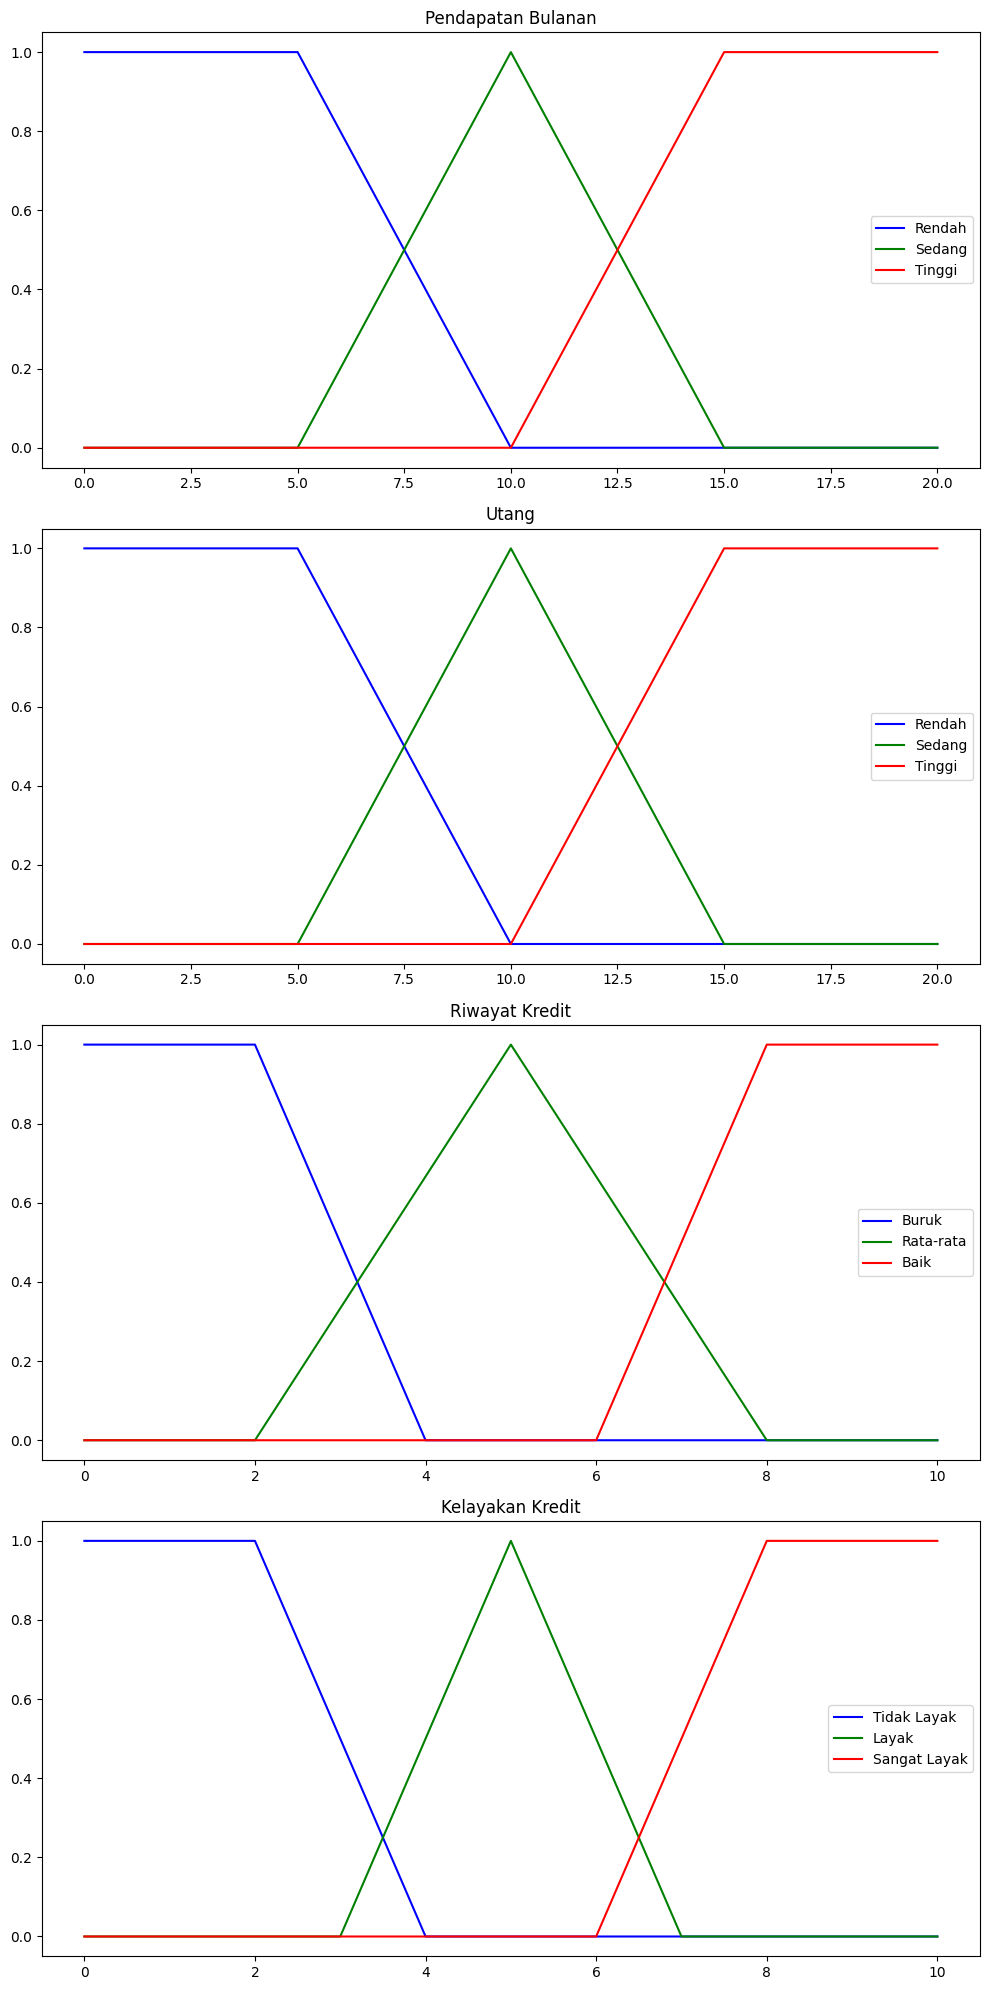

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20))

ax1.plot(x_pendapatan, pendapatan_rendah, 'b', label='Rendah')
ax1.plot(x_pendapatan, pendapatan_sedang, 'g', label='Sedang')
ax1.plot(x_pendapatan, pendapatan_tinggi, 'r', label='Tinggi')
ax1.set_title('Pendapatan Bulanan')
ax1.legend()

ax2.plot(x_utang, utang_rendah, 'b', label='Rendah')
ax2.plot(x_utang, utang_sedang, 'g', label='Sedang')
ax2.plot(x_utang, utang_tinggi, 'r', label='Tinggi')
ax2.set_title('Utang')
ax2.legend()

ax3.plot(x_riwayat, riwayat_buruk, 'b', label='Buruk')
ax3.plot(x_riwayat, riwayat_rata, 'g', label='Rata-rata')
ax3.plot(x_riwayat, riwayat_baik, 'r', label='Baik')
ax3.set_title('Riwayat Kredit')
ax3.legend()

ax4.plot(x_kelayakan, kelayakan_tidak, 'b', label='Tidak Layak')
ax4.plot(x_kelayakan, kelayakan_layak, 'g', label='Layak')
ax4.plot(x_kelayakan, kelayakan_sangat, 'r', label='Sangat Layak')
ax4.set_title('Kelayakan Kredit')
ax4.legend()

plt.tight_layout()
plt.show()

Input Data

In [6]:
pendapatan_input = 12  # Pendapatan dalam juta
utang_input = 8        # Utang dalam juta
riwayat_input = 7      # Riwayat Kredit

Implementasi Fuzzy

In [7]:
pendapatan_level_rendah = fuzz.interp_membership(x_pendapatan, pendapatan_rendah, pendapatan_input)
pendapatan_level_sedang = fuzz.interp_membership(x_pendapatan, pendapatan_sedang, pendapatan_input)
pendapatan_level_tinggi = fuzz.interp_membership(x_pendapatan, pendapatan_tinggi, pendapatan_input)

utang_level_rendah = fuzz.interp_membership(x_utang, utang_rendah, utang_input)
utang_level_sedang = fuzz.interp_membership(x_utang, utang_sedang, utang_input)
utang_level_tinggi = fuzz.interp_membership(x_utang, utang_tinggi, utang_input)

riwayat_level_buruk = fuzz.interp_membership(x_riwayat, riwayat_buruk, riwayat_input)
riwayat_level_rata = fuzz.interp_membership(x_riwayat, riwayat_rata, riwayat_input)
riwayat_level_baik = fuzz.interp_membership(x_riwayat, riwayat_baik, riwayat_input)

Rule Inference

In [8]:
rule1 = np.fmin(np.fmin(pendapatan_level_rendah, utang_level_tinggi), riwayat_level_buruk)  # Tidak Layak
rule2 = np.fmin(np.fmin(pendapatan_level_sedang, utang_level_sedang), riwayat_level_rata)   # Layak
rule3 = np.fmin(np.fmin(pendapatan_level_tinggi, utang_level_rendah), riwayat_level_baik)  # Sangat Layak

Agregasi

In [9]:
kelayakan_tidak_aggregated = np.fmax(rule1, kelayakan_tidak)
kelayakan_layak_aggregated = np.fmax(rule2, kelayakan_layak)
kelayakan_sangat_aggregated = np.fmax(rule3, kelayakan_sangat)

Defufuzzikasi

In [10]:
aggregated = np.fmax(kelayakan_tidak_aggregated,
                     np.fmax(kelayakan_layak_aggregated, kelayakan_sangat_aggregated))
kelayakan_output = fuzz.defuzz(x_kelayakan, aggregated, 'centroid')
output_membership = fuzz.interp_membership(x_kelayakan, aggregated, kelayakan_output)

Visualisasi

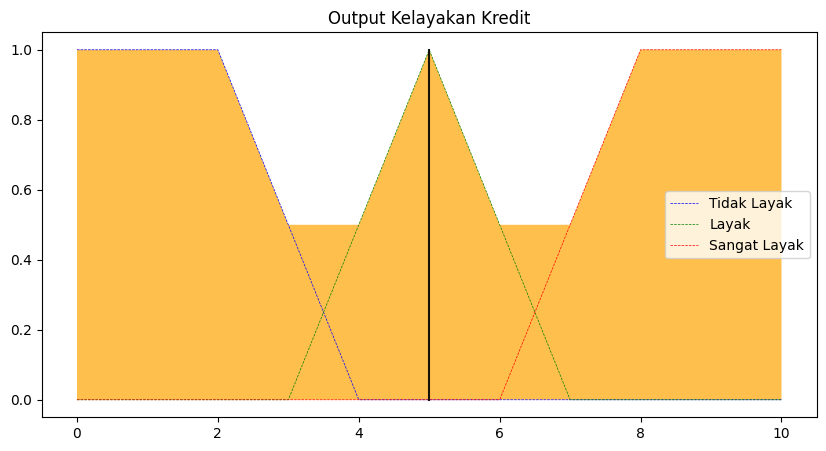

In [11]:
fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.plot(x_kelayakan, kelayakan_tidak, 'b', linewidth=0.5, linestyle='--', label='Tidak Layak')
ax0.plot(x_kelayakan, kelayakan_layak, 'g', linewidth=0.5, linestyle='--', label='Layak')
ax0.plot(x_kelayakan, kelayakan_sangat, 'r', linewidth=0.5, linestyle='--', label='Sangat Layak')
ax0.fill_between(x_kelayakan, np.zeros_like(x_kelayakan), aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([kelayakan_output, kelayakan_output], [0, output_membership], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Output Kelayakan Kredit')
ax0.legend()

plt.show()

In [12]:
print(f"Hasil Kelayakan Kredit: {kelayakan_output:.2f}")

Hasil Kelayakan Kredit: 5.00
